In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

# Définition des fichiers et dossiers
image_folder = "images_small"  # Dossier contenant les images redimensionnées
label_file = "labels.txt"  # Fichier contenant les labels

# Lire les labels depuis le fichier
with open(label_file, "r") as f:
    labels = [line.strip() for line in f.readlines()]

# Obtenir la liste triée des images
image_files = sorted([file for file in os.listdir(image_folder) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])

# Vérifier que le nombre d'images correspond au nombre de labels
if len(image_files) != len(labels):
    print("Avertissement: Le nombre d'images et de labels ne correspond pas !")

# Charger les images, les transformer en vecteurs et les normaliser
images = []
for filename in image_files:
    img_path = os.path.join(image_folder, filename)
    img = Image.open(img_path).convert('RGB')  # Convertir en RGB si nécessaire
    img_array = np.array(img).flatten()  # Transformer l'image en vecteur
    img_array = img_array / 255.0  # Normalisation entre 0 et 1
    images.append(img_array)

# Conversion en tableau NumPy
images = np.array(images)
labels = np.array(labels)

print(f"Chargé {len(images)} images et labels depuis {image_folder} et {label_file}.")
print("Dimensions des images vectorisées:", images.shape)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Sauvegarder les ensembles d'entraînement et de test dans des fichiers
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

print("Fichiers de train et de test générés et sauvegardés.")


c:\Users\LENOVO\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Chargé 119 images et labels depuis images_small et labels.txt.
Dimensions des images vectorisées: (119, 3072)
Fichiers de train et de test générés et sauvegardés.


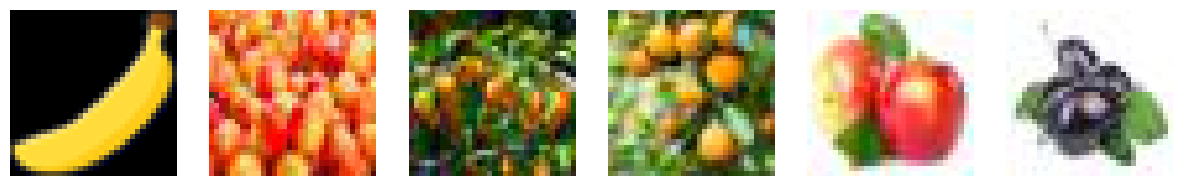

In [5]:
import matplotlib.pyplot as plt

# Récupérer les catégories uniques et une image pour chaque
unique_labels = np.unique(y_train)
fig, axes = plt.subplots(1, len(unique_labels), figsize=(15, 5))

for ax, label in zip(axes, unique_labels):
    index = np.where(y_train == label)[0][0]  # Trouver un index pour cette catégorie
    image = X_train[index].reshape(32, 32, 3)  # Adapter selon la taille des images
    ax.imshow(image)
    
    ax.axis("off")

plt.show()
